# Blind Detection

### Notes
Niek ruben max AI studenten startup.

transfer learning

Evaluation with labels

change model to sklearn tutorial


## On the  data set 

The dataset provides a large set of retina images taken using fundus photography under a variety of imaging conditions.
A clinician has rated each image for the severity of diabetic retinopathy on a scale of 0 to 4:

0.  No DR
1.  Mild
2.  Moderate
3.  Severe
4.  Proliferative DR

5.  Other disease

### Oog arts tips:
De ernst van de Diabetische retinopathie kan een afspiegeling zijn van het rest van het lichaam voor een diabetes patient.

5 is required want een oogarts zou dit zien en doorverwijzen ook als dat niet oorspronkelijk het doel was. Als dit niet werkt dan wordt het product hoogst waarschijnlijk niet gebruikt.
    5 is niet nodig als er al een regelmatige check van een oog arts is (elke 2/4 jaar)

This data set contains noise in both the images and labels. Images may contain artifacts, be out of focus, underexposed, or overexposed. The images were gathered from multiple clinics using a variety of cameras over an extended period of time, which will introduce further variation.

## Considered Datasets
### Dataset 1
Dataset of eyes with and without Diabetische retinopathie: <br>
https://www.kaggle.com/donkeys/retinopathy-train-2015?select=trainLabels.csv

Op 3 plekken worden diabetes screeningen gedaan voor de ogen
1. ziekenhuis
2. kliniek (prive ziekenhuis)
3. optiek zaken (optimitrist voert het onderzoek voor de ogen uit)
    - maakt foto van netvlies
    - dan kijken hoe goed hij kan kijken

Als de ernst moderate of erger is dan worden de foto's altijd door een oog arts bekeken in een ziekenhuis of kliniek
<br>
Grootste voordeel: Zou de foto's kunnen laten maken door niet gespecialiseerd personeel wat geld en tijd kan schelen voor de diabetes patienten en artsen.

### Choice
We besloten dat dataset 1 de meeste waarde voor de oogzorg in combinatie met de beste kans op slagen heeft.

In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.io import imread_collection


In [5]:
def transformImage(f, img_num=None):
        img = io.imread(f)
        im_res = resize(img,(597, 896))
        ## Turn images grey
        # img_gray = rgb2gray(img)        
        # im_res = resize(img_gray,(597, 896))

        return im_res

In [14]:
if __name__ == "__main__":
    img_collections = io.ImageCollection('Data/trainSet/*.png',load_func=transformImage)
    img_collections[1].shape

In [15]:
img_collections[3].shape

(597, 896, 3)

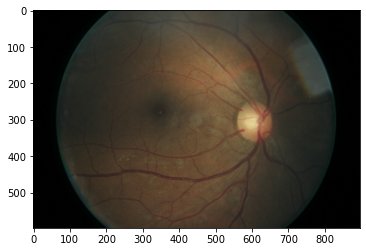

In [16]:
plt.imshow(img_collections[0], cmap=plt.cm.binary)

In [18]:
img_collections[0]
shapedImg_collections = np.array(img_collections[:1000])
# shapedImg_collections = np.array(shapedImg_collections)

## Labels

In [ ]:
labels = pd.read_csv("C:/Users/mauri/Documents/GitHub/EyeDiseaseDetection/Data/trainLabels.csv")

In [56]:
labels_reset = labels.set_index('image')
# labels_reset[['level']]

label_list =(labels_reset[['level']].values.flatten().tolist())

In [57]:
label_list = np.asarray(label_list)
label_list

array([0, 0, 0, ..., 0, 0, 1])

In [58]:
label_names = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
label_names[label_list[1]]


'No DR'

In [59]:
label_list = label_list[824:1824]
label_list[0]

3

# Model test

In [23]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(597, 896, 3)))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1604736)           0         
_________________________________________________________________
dense (Dense)                (None, 128)               205406336 
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 205,407,626
Trainable params: 205,407,626
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x=shapedImg_collections, y=label_list, epochs=5)

Epoch 1/5
32/32 [==============================] - 31s 704ms/step - loss: 98.4515 - accuracy: 0.5820
Epoch 2/5
32/32 [==============================] - 22s 690ms/step - loss: 29.6036 - accuracy: 0.5860
Epoch 3/5
32/32 [==============================] - 22s 700ms/step - loss: 32.4668 - accuracy: 0.5960
Epoch 4/5
32/32 [==============================] - 22s 684ms/step - loss: 23.1070 - accuracy: 0.6110
Epoch 5/5
32/32 [==============================] - 22s 678ms/step - loss: 12.8265 - accuracy: 0.6380


In [61]:
version = "002"
model.save(f"Models/model{version}.h5")

# Testing

In [62]:
saved_model = keras.models.load_model("Models/model002.h5")
saved_model

In [63]:
test_collections = io.ImageCollection('Data/testSet/*.png',load_func=transformImage)
test_collections[1].shape
shapedTest_collections = np.array(test_collections)

In [64]:
predictions = saved_model.predict(shapedTest_collections)

In [65]:
startingIndex = 0
for index in range(startingIndex, startingIndex+12):
    print(f"{index+2}: {label_names[np.argmax(predictions[index])]}")

2: Proliferative DR
3: No DR
4: No DR
5: No DR
6: No DR
7: No DR
8: No DR
9: Mild
10: No DR
11: Moderate
12: No DR
13: No DR


In [66]:
startingIndex = 0
for index in range(startingIndex, startingIndex+12):
    print(f"{index+2}: {[np.argmax(predictions[index])]}")

2: [4]
3: [0]
4: [0]
5: [0]
6: [0]
7: [0]
8: [0]
9: [1]
10: [0]
11: [2]
12: [0]
13: [0]


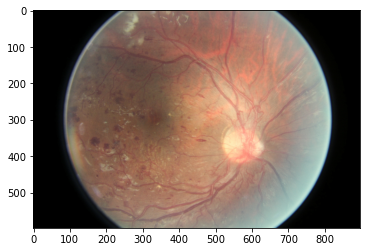

In [67]:
plt.imshow(shapedTest_collections[6], cmap=plt.cm.binary)

## sckitlearn classification
apply grid search and corss validation after getting ti to work

In [20]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Import datasets, classifiers and performance metrics
import skimage.io as io
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.io import imread_collection
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

## Labels

In [40]:
labels = pd.read_csv("C:/Users/mauri/Documents/GitHub/EyeDiseaseDetection/Data/DrpSet/trainLabels.csv")

In [41]:
labels_reset = labels.set_index('image')
# labels_reset[['level']]

label_list =(labels_reset[['level']].values.flatten().tolist())

In [42]:
label_list = np.asarray(label_list)
label_list

array([0, 0, 0, ..., 0, 0, 1])

In [43]:
label_names = ["No DR", "Mild", "Moderate", "Severe", "Proliferative DR"]
label_names[label_list[1]]

'No DR'

In [50]:
label_list = label_list[0:346]
label_list[0]

0

In [66]:
# pandas label data


TypeError: 'DataFrame' object is not callable

## Model

In [51]:
def transformImage(f, img_num=None):
        img = io.imread(f)
        im_res = resize(img,(597, 896))
        return im_res

def transformImageFlat(f, img_num=None):
        img = io.imread(f)
        # im_res = resize(img,(597, 896))
        ## Turn images grey
        img_gray = rgb2gray(img)        
        im_res = resize(img_gray,(597, 896))
        im_res = np.reshape(im_res, 534912)

        return im_res

In [52]:
if __name__ == "__main__":
    img_collections = io.ImageCollection('Data/testSet/*.png',load_func=transformImage)
    img_collectionsFlat = io.ImageCollection('Data/testSet/*.png',load_func=transformImageFlat)

In [53]:
i = 0
print(img_collections[i].shape)
print(img_collectionsFlat[i].shape)

(597, 896, 3)
(534912,)


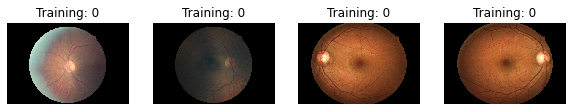

In [54]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, img_collections, label_list):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [55]:
# flatten the images
n_samples = len(img_collections)
data = img_collectionsFlat

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, label_list, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

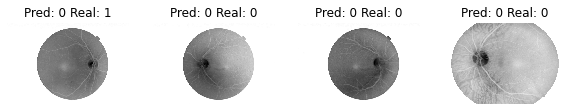

In [59]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction, realCat in zip(axes, X_test, predicted, y_test):
    ax.set_axis_off()
    image = image.reshape(597, 896)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Pred: {prediction} Real: {realCat}")

In [57]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       123
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         8

    accuracy                           0.71       173
   macro avg       0.14      0.20      0.17       173
weighted avg       0.51      0.71      0.59       173




C:\Users\mauri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mauri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mauri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
